In [ ]:
!git clone https://github.com/parisazeynaly/stroke-prediction.git

fatal: destination path 'stroke-prediction' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Display Basic Info
print(df.info())  # Dataset summary
print(df.describe().T.round(2))  # Statistical summary
print(df.head())  # First few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                    count      mean       std    min       25%       50%  \
id                 5110.0  36517.83  21161.72  67.00  17741.25  36932.00   


In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


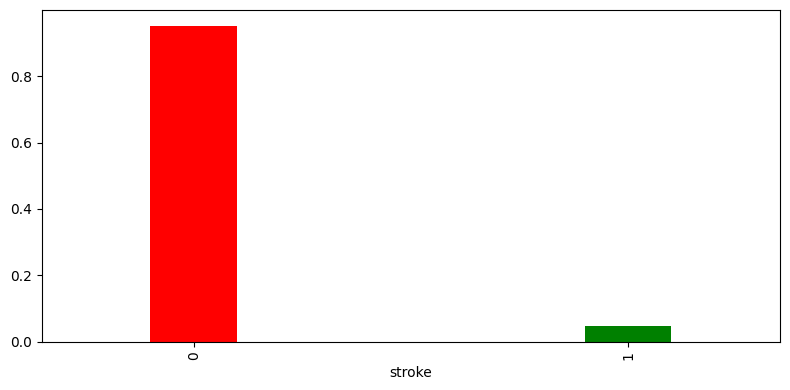

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


<ipython-input-17-c1a2153991e1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
<ipython-input-17-c1a2153991e1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
<ipython-input-17-c1a2153991e1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed 

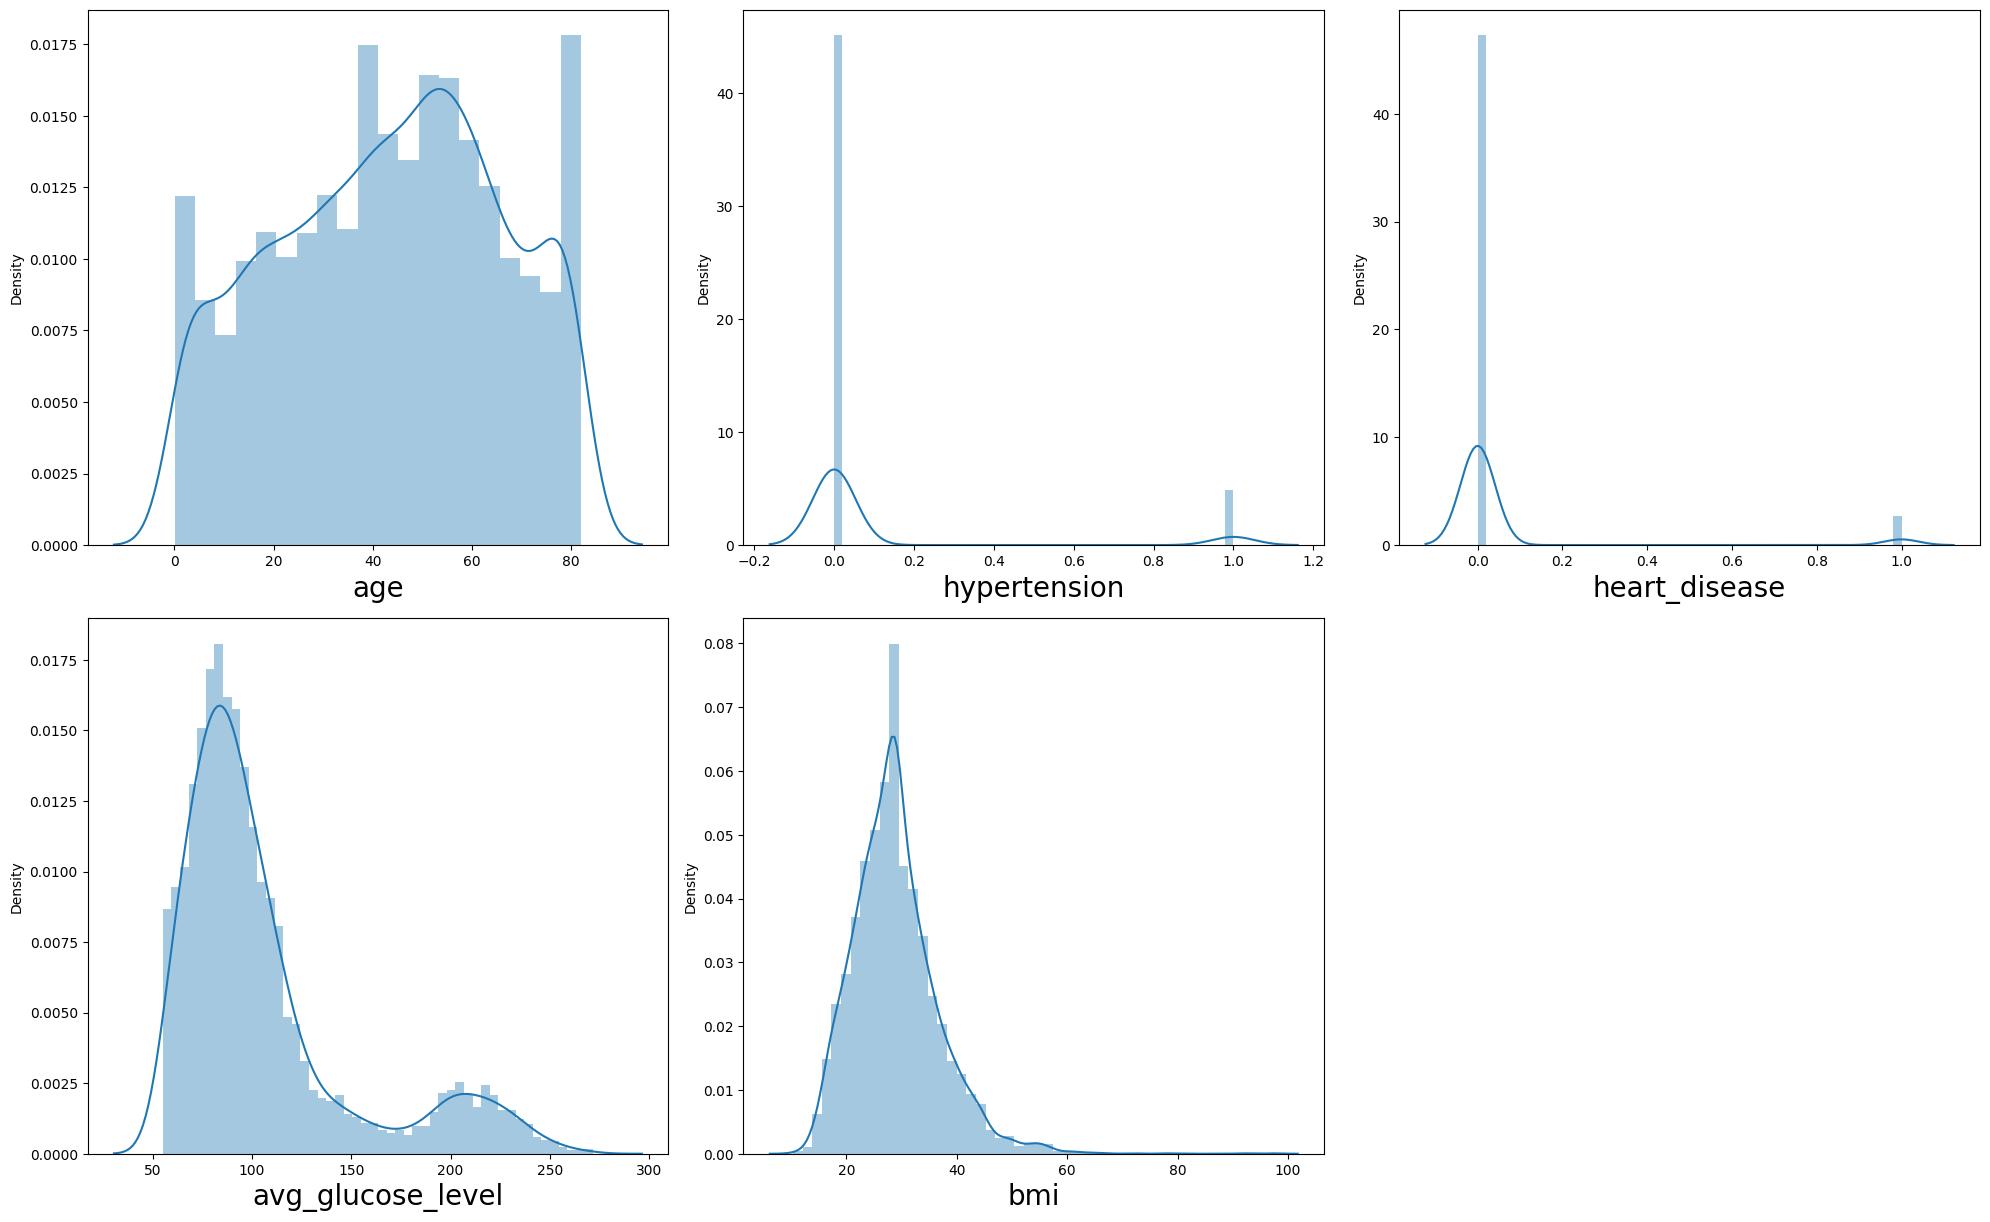

In [ ]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df['smoking_status'].value_counts()


,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
df.gender.value_counts()


,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,True,False
1,False,False
2,True,False
3,False,False
4,False,False


In [ ]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,True
1,True
2,True
3,True
4,True


In [ ]:
df.work_type.value_counts()
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,False,False,True,False


In [ ]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,True
1,False
2,False
3,True
4,False


In [ ]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,True,False,False
1,False,True,False
2,False,True,False
3,False,False,True
4,False,True,False


In [ ]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,False,True,False,True,False,False,True,True,False,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,False,True,False,False,True,False,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,False,True,False,True,False,False,False,False,True,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,False,True,False,True,False,False,True,False,False,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']


In [ ]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


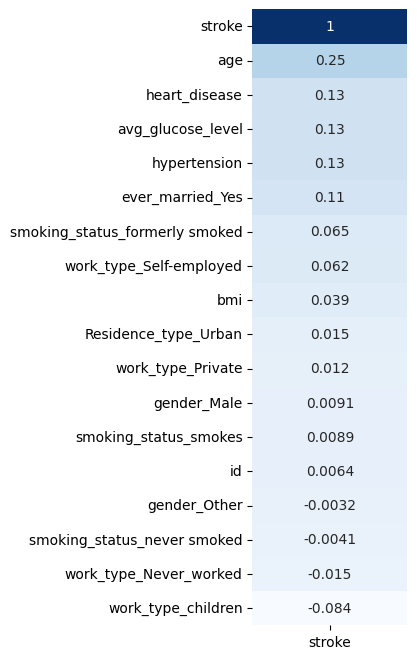

In [ ]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

In [ ]:
data.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
x = data.drop("stroke", axis=1)
x.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
y = data[['stroke']]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# accuracy
decision.score(x_test, y_test)

0.9093064611736811

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
# accuracy
rf.score(x_test, y_test)

0.943094250148192

In [ ]:
from sklearn.svm import SVC
model = SVC(C= 0.1, gamma = 1, kernel = 'rbf')
model.fit(x_train,y_train)
prep = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)